# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import data

In [2]:
data=pd.read_csv('/kaggle/input/top-games-dataset/games_dataset.csv')
data

,Game Name,Genre,Platform,Release Year,User Rating
0,Sekiro: Shadows Die Twice,Sports,Nintendo Switch,2014,9.654719
1,Control,Puzzle,Nintendo Switch,2000,3.457386
2,Among Us,Strategy,Nintendo Switch,2007,5.367622
3,Call of Duty: Modern Warfare,Stealth,PlayStation,2005,1.240325
4,League of Legends,Simulation,PC,2021,3.535476
...,...,...,...,...,...
4995,The Legend of Zelda: Breath of the Wild,Sports,PC,2013,6.352838
4996,Assassin's Creed Valhalla,Stealth,Mobile,2020,1.852730
4997,Fall Guys: Ultimate Knockout,Sports,Mobile,2021,5.268067
4998,Borderlands 3,Platformer,Xbox,2018,4.558510


# Basic Info

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Game Name     5000 non-null   object 
 1   Genre         5000 non-null   object 
 2   Platform      5000 non-null   object 
 3   Release Year  5000 non-null   int64  
 4   User Rating   5000 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 195.4+ KB


* Cleaned data

In [4]:
data.head(10)

,Game Name,Genre,Platform,Release Year,User Rating
0,Sekiro: Shadows Die Twice,Sports,Nintendo Switch,2014,9.654719
1,Control,Puzzle,Nintendo Switch,2000,3.457386
2,Among Us,Strategy,Nintendo Switch,2007,5.367622
3,Call of Duty: Modern Warfare,Stealth,PlayStation,2005,1.240325
4,League of Legends,Simulation,PC,2021,3.535476
5,Counter-Strike: Global Offensive,Puzzle,PlayStation,2023,1.112864
6,Red Dead Redemption 2,Shooter,Xbox,2011,8.353946
7,Halo Infinite,Adventure,PC,2014,7.167983
8,The Legend of Zelda: Breath of the Wild,Horror,Nintendo Switch,2004,8.608596
9,Valorant,Adventure,Mobile,2010,1.336979


In [5]:
data.describe(include='all')

,Game Name,Genre,Platform,Release Year,User Rating
count,5000,5000,5000,5000.000000,5000.000000
unique,58,14,5,NaN,NaN
top,The Legend of Zelda: Breath of the Wild,Sports,PC,NaN,NaN
freq,108,403,1056,NaN,NaN
mean,NaN,NaN,NaN,2011.375400,5.524913
std,NaN,NaN,NaN,6.943984,2.598429
min,NaN,NaN,NaN,2000.000000,1.005878
25%,NaN,NaN,NaN,2005.000000,3.260596
50%,NaN,NaN,NaN,2011.000000,5.574233
75%,NaN,NaN,NaN,2017.000000,7.802727


# Checking null values

In [6]:
data.isnull().sum()

Game Name       0
Genre           0
Platform        0
Release Year    0
User Rating     0
dtype: int64

In [7]:
data.nunique()

Game Name         58
Genre             14
Platform           5
Release Year      24
User Rating     5000
dtype: int64

# Checking  duplicates

In [8]:
data.duplicated().sum()

0

* No duplicate values

In [9]:
data['Genre'].value_counts()

Genre
Sports          403
Puzzle          384
Racing          369
Simulation      368
Stealth         360
Role-playing    360
Horror          356
Strategy        353
Survival        353
Adventure       342
Action          340
Platformer      338
Shooter         337
Fighting        337
Name: count, dtype: int64

In [10]:
data.head()

,Game Name,Genre,Platform,Release Year,User Rating
0,Sekiro: Shadows Die Twice,Sports,Nintendo Switch,2014,9.654719
1,Control,Puzzle,Nintendo Switch,2000,3.457386
2,Among Us,Strategy,Nintendo Switch,2007,5.367622
3,Call of Duty: Modern Warfare,Stealth,PlayStation,2005,1.240325
4,League of Legends,Simulation,PC,2021,3.535476


# Exploratory Data Analysis

## Display the average "User Rating" for each "Genre" grouped by "Release Year" 

In [11]:
data.pivot_table(index='Release Year',columns='Genre',values='User Rating')

Genre,Action,Adventure,Fighting,Horror,Platformer,Puzzle,Racing,Role-playing,Shooter,Simulation,Sports,Stealth,Strategy,Survival
Release Year,,,,,,,,,,,,,,
2000,4.792566,5.707406,5.368102,5.324325,3.709967,6.171243,4.497303,4.083092,4.807539,5.939078,5.239857,6.043113,5.193394,6.434520
2001,5.149148,5.979537,5.916694,5.069800,4.718542,4.925205,3.983724,4.560138,5.853935,5.641819,6.250110,5.262835,6.464887,7.131182
2002,5.789942,4.454901,4.929495,6.641548,5.499112,6.269421,4.622382,4.969828,5.895783,4.961995,5.546754,5.758791,5.422864,5.528630
2003,5.535989,5.572624,4.537974,5.966249,5.917903,5.171086,6.011053,5.973560,5.235952,6.319749,5.947414,6.793946,5.700356,5.453226
2004,6.004106,6.267968,5.271329,6.464748,5.013531,5.419032,6.227680,6.014830,5.450936,5.673857,5.913373,5.368977,6.116667,7.141449
2005,5.910474,3.921878,6.169603,6.753734,5.033078,6.276811,6.302654,5.166252,5.954930,6.078833,5.023117,5.218532,5.193222,6.089810
2006,4.357031,6.027295,4.332155,6.743247,4.872929,5.729895,5.550454,5.499541,5.821188,5.358483,5.684858,5.525575,6.114438,5.038093
2007,5.815732,5.097449,6.038965,6.102717,4.607367,4.966212,5.272349,6.000636,4.033447,3.740743,4.422019,5.211371,5.143634,5.257410
2008,5.764235,6.091321,4.868218,5.789089,4.589911,4.998671,5.731132,5.017208,5.084900,5.986799,4.142751,5.338528,6.134659,5.718336


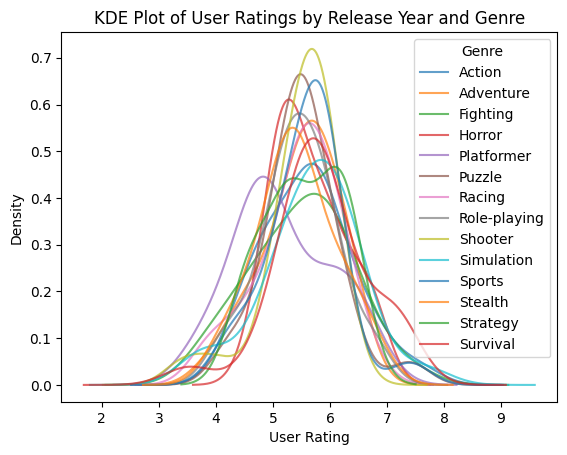

In [12]:
data.pivot_table(index='Release Year',columns='Genre',values='User Rating').plot(kind='kde',alpha=0.7)
# Add labels and title
plt.xlabel('User Rating')
plt.ylabel('Density')
plt.title('KDE Plot of User Ratings by Release Year and Genre')

# Show the plot
plt.show()

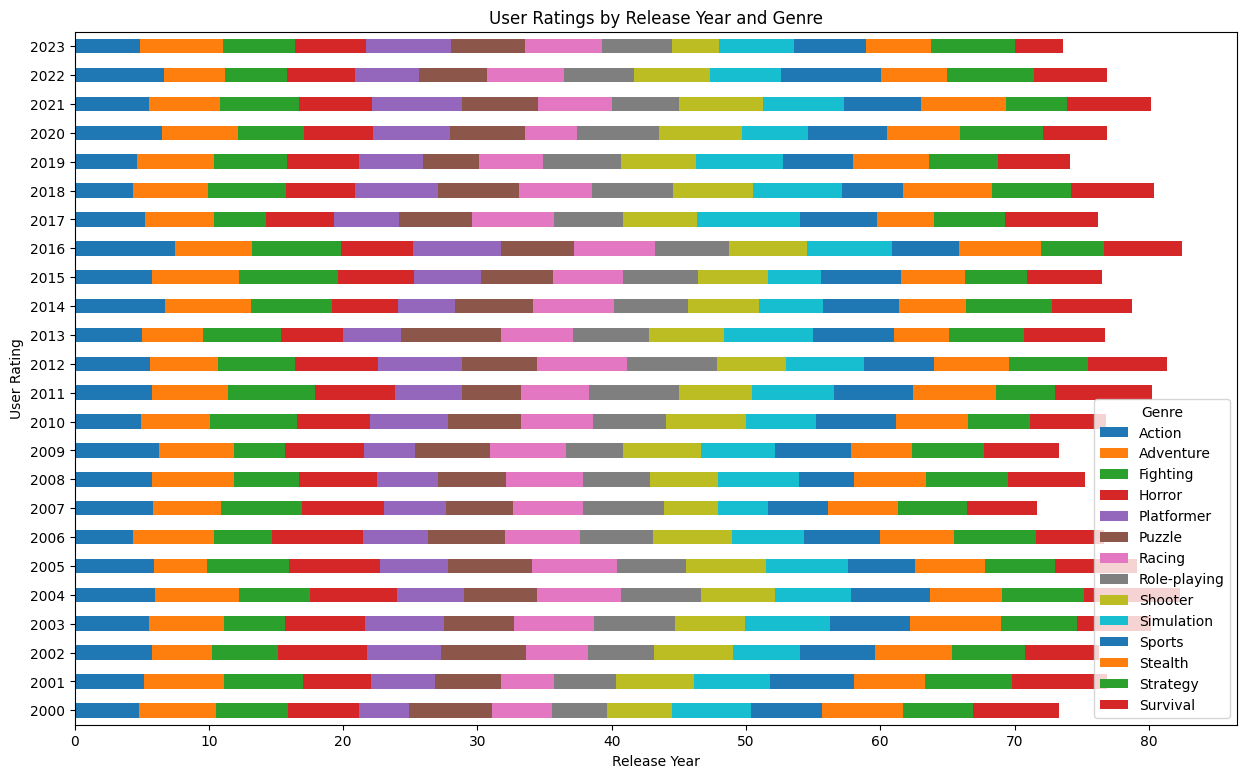

In [13]:
data.pivot_table(index='Release Year',columns='Genre',values='User Rating').plot(kind='barh',stacked=True,figsize=(15,9))
# Add labels and title
plt.xlabel('Release Year')
plt.ylabel('User Rating')
plt.title('User Ratings by Release Year and Genre')

# Show the plot
plt.show()

## What is the most popular "Platform" (based on average "User Rating") for games released in a specific year?

In [14]:
data.pivot_table(index='Release Year',columns='Platform',values='User Rating')

Platform,Mobile,Nintendo Switch,PC,PlayStation,Xbox
Release Year,,,,,
2000,5.557137,5.135236,5.387842,5.760250,4.814096
2001,5.023197,5.663524,5.628997,5.457116,5.807537
2002,5.357028,5.197170,5.745938,5.210480,5.600636
2003,5.642124,5.624789,5.770055,5.849101,5.859914
2004,5.254416,6.125083,5.684381,6.163302,6.372960
2005,6.115731,6.008687,5.372304,5.528884,5.334271
2006,5.476221,5.466327,5.409460,5.326741,5.695601
2007,5.200136,5.175414,5.007182,5.222362,4.589852
2008,5.702297,5.298067,5.501417,5.237712,5.441352


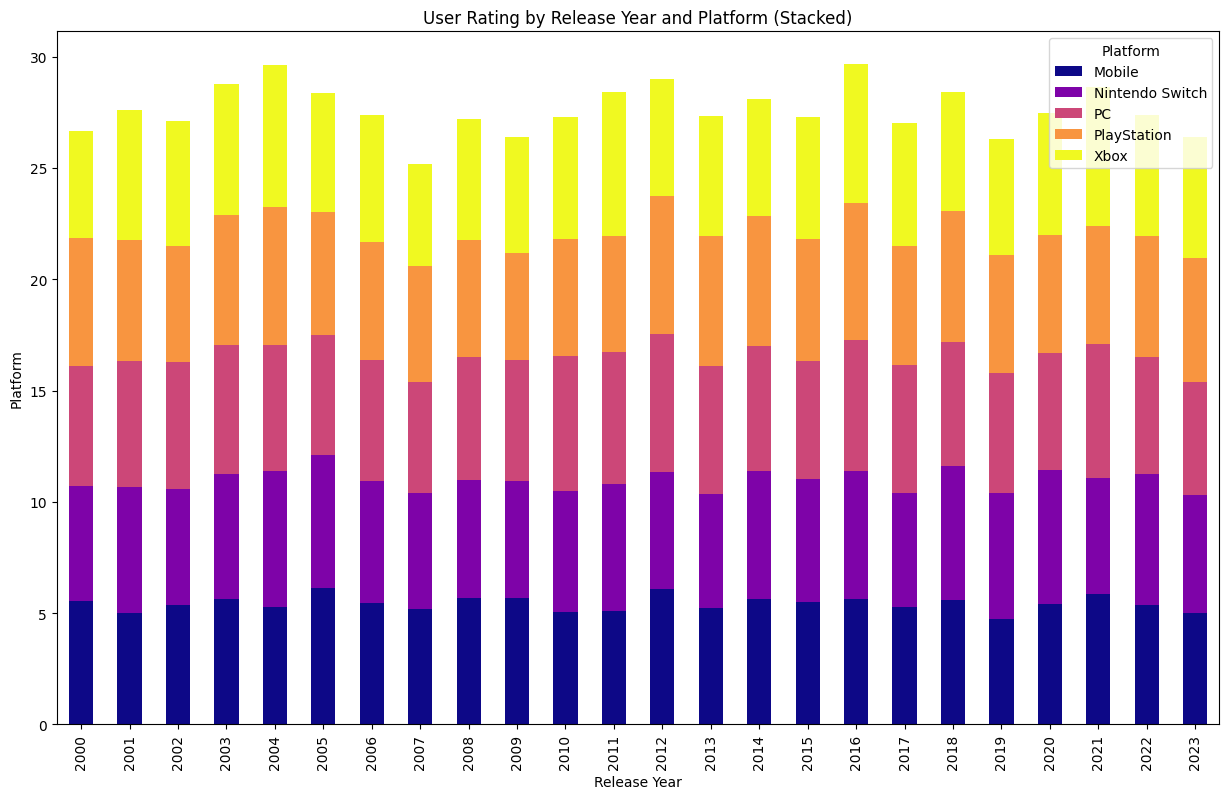

In [15]:
# Create a stacked bar plot

data.pivot_table(index='Release Year',columns='Platform',values='User Rating').plot(kind='bar',figsize=(15,9),stacked=True, colormap='plasma')

# Add labels and title
plt.ylabel('Platform')
plt.xlabel('Release Year')
plt.title('User Rating by Release Year and Platform (Stacked)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

## What is the trend in "User Ratings" for a particular "Game Name" over time when grouped by "Genre" and "Platform"?

In [16]:
data.pivot_table(index=['Game Name', 'Genre', 'Platform'],columns=['Release Year'],values='User Rating')

Release Year                                 2000  2001      2002      2003  \
Game Name         Genre     Platform                                          
Among Us          Action    PC                NaN   NaN       NaN       NaN   
                            PlayStation       NaN   NaN       NaN       NaN   
                            Xbox              NaN   NaN       NaN  5.018489   
                  Adventure Mobile            NaN   NaN       NaN       NaN   
                            Nintendo Switch   NaN   NaN       NaN       NaN   
...                                           ...   ...       ...       ...   
World of Warcraft Survival  Mobile            NaN   NaN       NaN       NaN   
                            Nintendo Switch   NaN   NaN       NaN       NaN   
                            PC                NaN   NaN  6.563785       NaN   
                            PlayStation       NaN   NaN       NaN       NaN   
                            Xbox              NaN   NaN       NaN       NaN   

Release Year                                     2004  2005  2006      2007  \
Game Name         Genre     Platform                                          
Among Us          Action    PC                    NaN   NaN   NaN       NaN   
                            PlayStation           NaN   NaN   NaN       NaN   
                            Xbox                  NaN   NaN   NaN       NaN   
                  Adventure Mobile                NaN   NaN   NaN  5.051738   
                            Nintendo Switch       NaN   NaN   NaN       NaN   
...                                               ...   ...   ...       ...   
World of Warcraft Survival  Mobile                NaN   NaN   NaN       NaN   
                            Nintendo Switch       NaN   NaN   NaN       NaN   
                            PC                    NaN   NaN   NaN  3.088363   
                            PlayStation      6.937046   NaN   NaN       NaN   
                            Xbox                  NaN   NaN   NaN       NaN   

Release Year                                 2008      2009  ...      2014  \
Game Name         Genre     Platform                         ...             
Among Us          Action    PC                NaN  1.472137  ...       NaN   
                            PlayStation       NaN       NaN  ...       NaN   
                            Xbox              NaN       NaN  ...       NaN   
                  Adventure Mobile            NaN       NaN  ...  9.865649   
                            Nintendo Switch   NaN       NaN  ...       NaN   
...                                           ...       ...  ...       ...   
World of Warcraft Survival  Mobile            NaN       NaN  ...       NaN   
                            Nintendo Switch   NaN       NaN  ...       NaN   
                            PC                NaN       NaN  ...       NaN   
                            PlayStation       NaN       NaN  ...       NaN   
                            Xbox              NaN       NaN  ...       NaN   

Release Year                                 2015      2016      2017  \
Game Name         Genre     Platform                                    
Among Us          Action    PC                NaN       NaN       NaN   
                            PlayStation       NaN       NaN       NaN   
                            Xbox              NaN       NaN       NaN   
                  Adventure Mobile            NaN       NaN       NaN   
                            Nintendo Switch   NaN       NaN       NaN   
...                                           ...       ...       ...   
World of Warcraft Survival  Mobile            NaN       NaN       NaN   
                            Nintendo Switch   NaN       NaN       NaN   
                            PC                NaN       NaN       NaN   
                            PlayStation       NaN       NaN       NaN   
                            Xbox              NaN  2.

## How does the popularity of different "Genres" change over time?

In [17]:
data.groupby('Release Year')['Genre'].value_counts()

Release Year  Genre     
2000          Stealth       21
              Sports        20
              Adventure     19
              Shooter       18
              Puzzle        17
                            ..
2023          Racing        12
              Survival      12
              Platformer    10
              Shooter       10
              Strategy       9
Name: count, Length: 336, dtype: int64

## What are the most popular "Genres" for games released in 2023?

Text(0.5, 1.0, 'Distribution of Genres in 2023 ')

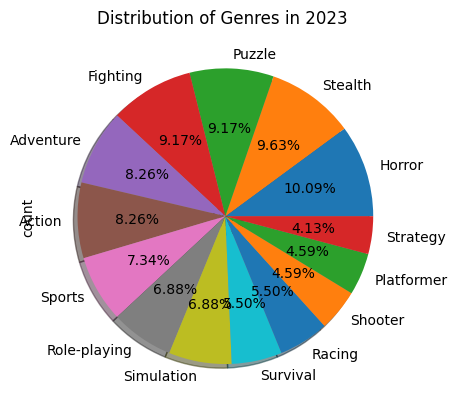

In [18]:
df=data[data['Release Year']==2023]
df['Genre'].value_counts().plot(kind='pie',shadow=True,autopct="%1.2f%%",explode=(0,0,0,0,0,0,0,0,0,0,0,0,0,0))
plt.title('Distribution of Genres in 2023 ')

## Which "Platform" and "Genre" combination has the overall highest "User Rating" in 2023?

In [19]:
grouped_data=df.groupby(['Platform','Genre'])['User Rating'].max()
grouped_data

Platform  Genre     
Mobile    Action        7.122121
          Adventure     9.928359
          Fighting      9.724570
          Horror        8.556175
          Platformer    4.153482
                          ...   
Xbox      Simulation    8.364700
          Sports        6.969353
          Stealth       8.113537
          Strategy      6.630009
          Survival      4.233543
Name: User Rating, Length: 63, dtype: float64

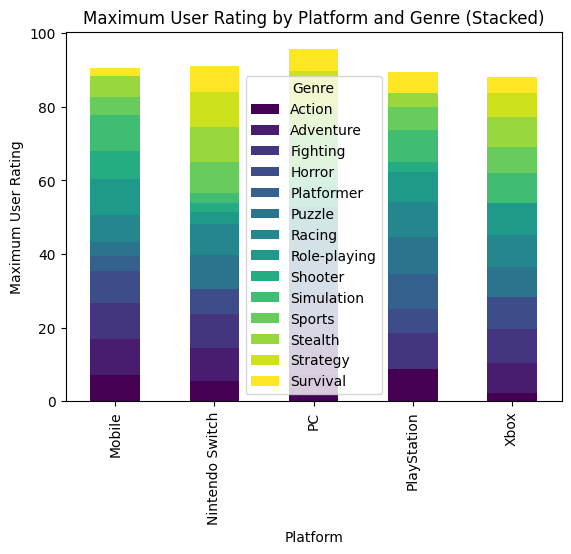

In [20]:
# Create a stacked bar plot
grouped_data.unstack(level='Genre').plot(kind='bar', stacked=True, colormap='viridis')

# Add labels and title
plt.xlabel('Platform')
plt.ylabel('Maximum User Rating')
plt.title('Maximum User Rating by Platform and Genre (Stacked)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

## What is the trend in "User Ratings" for a particular "Game Name" over time?

In [21]:
data.pivot_table(index='Game Name',columns='Release Year',values='User Rating')

Release Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Game Name,,,,,,,,,,,,,,,,,,,,,
Among Us,5.306207,4.750040,3.511664,5.073479,4.940792,5.946039,3.324777,3.564501,8.060281,4.083012,...,4.944702,8.819817,7.323762,4.340068,4.619417,6.544652,5.949501,4.163665,6.610120,5.400854
Animal Crossing: New Horizons,6.221536,4.977906,3.097964,5.655463,2.729139,7.567823,NaN,7.043120,5.991094,4.786817,...,7.375497,4.629826,1.819994,3.079991,5.346236,4.309813,4.986710,5.799252,2.204000,4.613669
Apex Legends,2.646352,NaN,4.195858,6.354492,6.081552,5.329874,6.068070,5.968036,6.005083,5.180509,...,6.627292,4.352768,6.068711,3.206022,4.942444,4.629143,4.289376,5.560620,3.897607,5.010293
Assassin's Creed Valhalla,5.748494,4.169450,5.549522,5.848724,8.429535,5.655775,3.651135,3.996286,4.730154,4.589985,...,5.911386,7.200887,4.751232,5.243508,5.087490,6.766843,3.528438,NaN,4.725537,9.052391
Borderlands 3,6.082176,6.161318,2.965850,5.379221,7.339656,7.012207,6.632173,2.298752,5.665469,5.001510,...,4.831516,4.411425,6.679331,6.548427,5.232704,5.976870,6.052124,7.816503,4.505875,5.846161
Call of Duty: Modern Warfare,4.738690,2.972342,6.095808,6.326703,2.441814,7.492065,5.012581,5.260326,4.478103,6.891433,...,6.312857,7.412030,5.073255,2.296955,3.569621,7.259114,9.163644,2.325355,4.507234,7.094832
Control,4.794939,6.362454,5.840291,4.893286,7.109794,6.172053,4.748482,5.687890,6.200241,4.244761,...,NaN,5.340343,3.784211,2.642025,7.698542,6.175475,6.423508,7.199409,6.264554,5.577460
Counter-Strike: Global Offensive,6.350496,3.087993,4.387805,7.141134,4.930659,3.381215,5.443279,6.984657,5.378847,4.448098,...,3.985675,4.445300,4.882515,5.349362,5.897041,9.465062,2.588986,5.628631,5.322330,3.925510
Cyberpunk 2077,4.642123,7.763329,3.890007,6.201851,NaN,6.236068,4.503660,3.353838,8.359602,4.612044,...,5.902081,3.776256,6.568933,7.339718,8.693578,9.406478,6.372060,4.999365,1.627809,8.543758


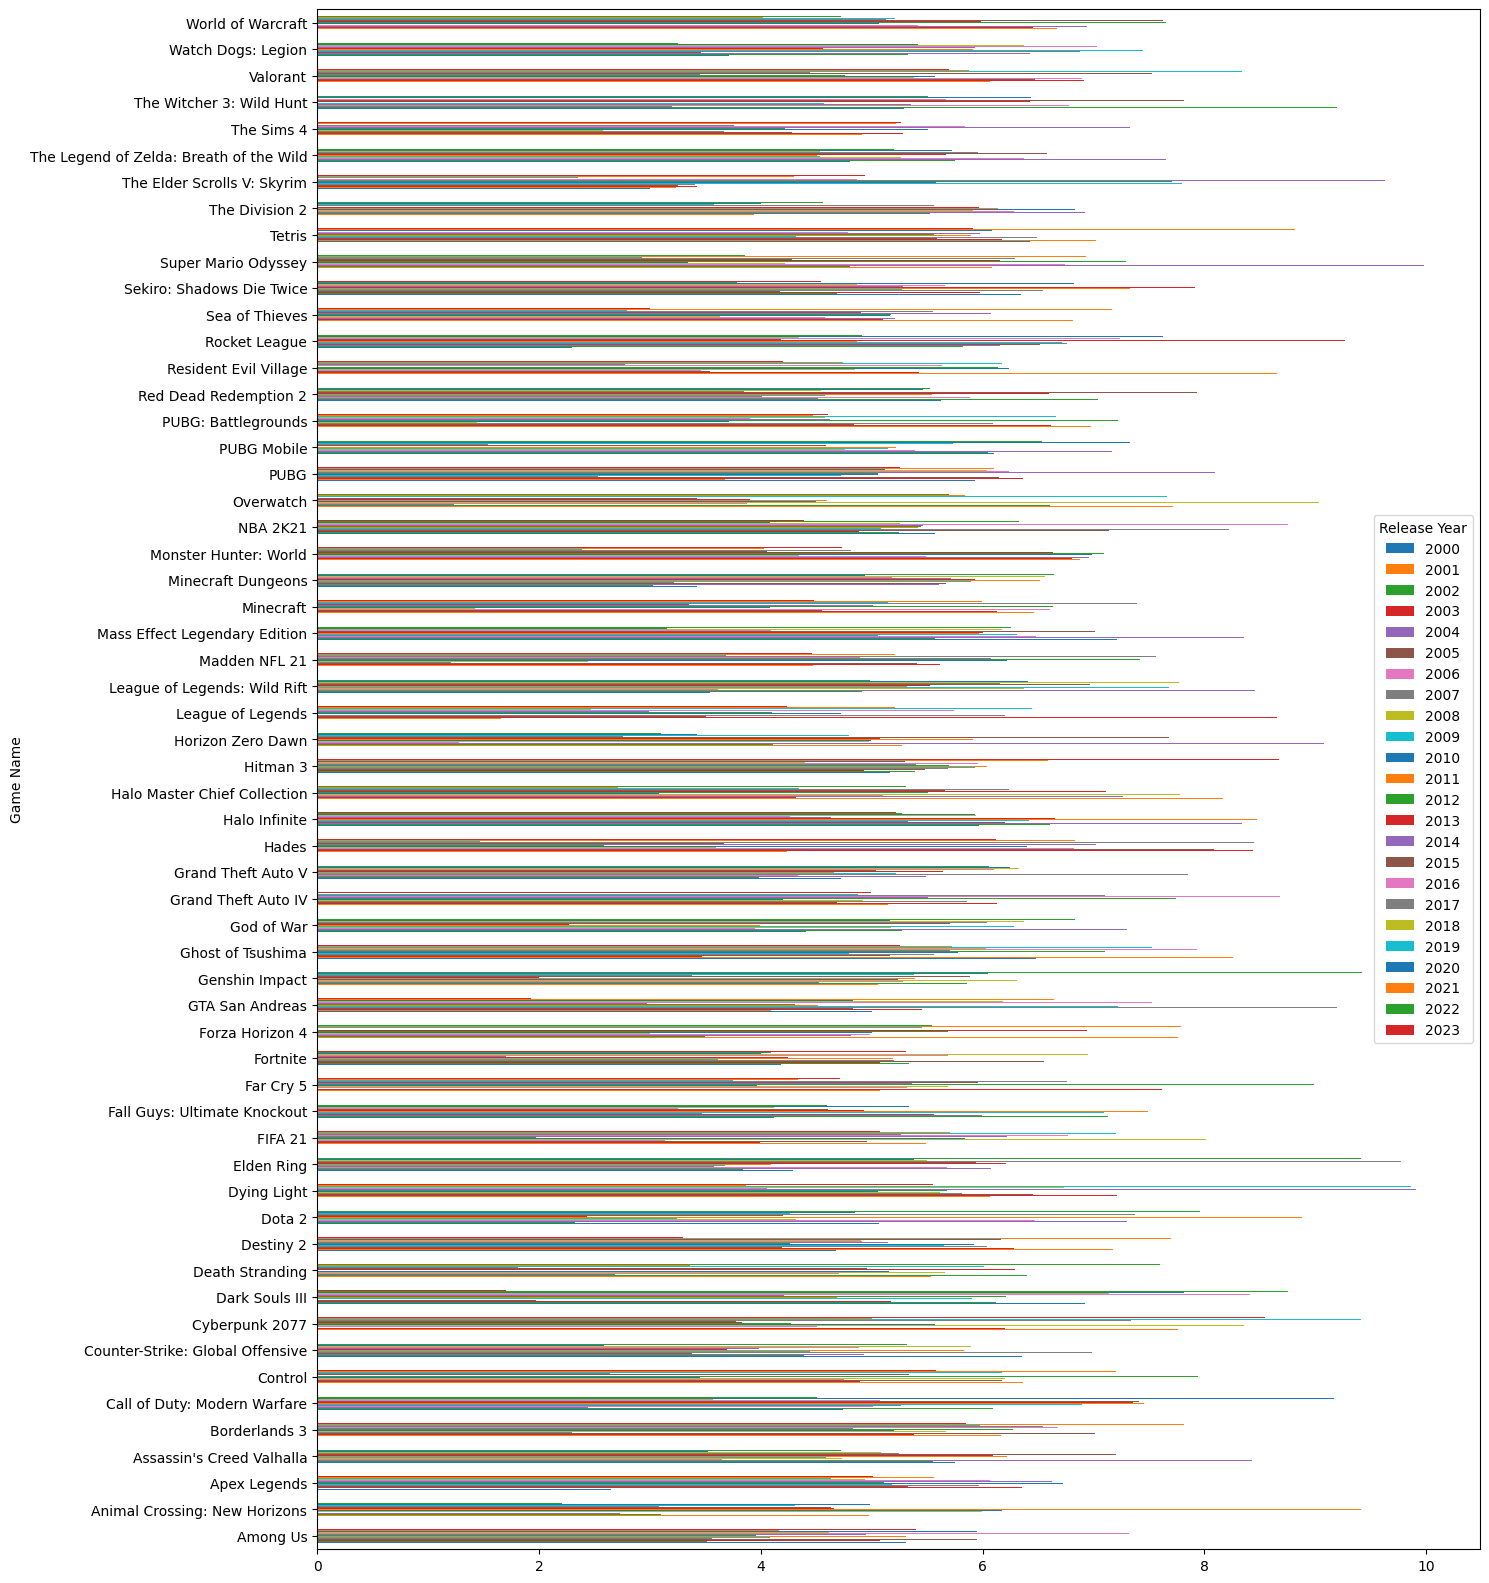

In [22]:
data.pivot_table(index='Game Name',columns='Release Year',values='User Rating').plot(kind='barh',figsize=(15,20));

## What is the trend in "User Ratings" for a particular "Game Name" across different "Platforms"?

In [23]:
pivoted_data=data.pivot_table(index='Game Name',columns='Platform',values='User Rating')
pivoted_data

Platform,Mobile,Nintendo Switch,PC,PlayStation,Xbox
Game Name,,,,,
Among Us,5.817075,4.885903,5.904769,4.516201,6.023413
Animal Crossing: New Horizons,5.399175,3.938252,5.827492,5.234863,5.064142
Apex Legends,5.677763,5.308422,4.963470,4.804012,5.044759
Assassin's Creed Valhalla,5.308654,5.781038,6.138003,6.006932,5.268976
Borderlands 3,5.141620,5.567131,5.516861,5.836209,6.250538
Call of Duty: Modern Warfare,4.843344,6.660389,5.921750,5.257792,5.675758
Control,4.469832,6.084091,5.948862,5.799586,5.314363
Counter-Strike: Global Offensive,4.380217,5.103762,5.141358,5.801658,5.446005
Cyberpunk 2077,5.680320,4.741533,5.190976,6.833414,6.328788


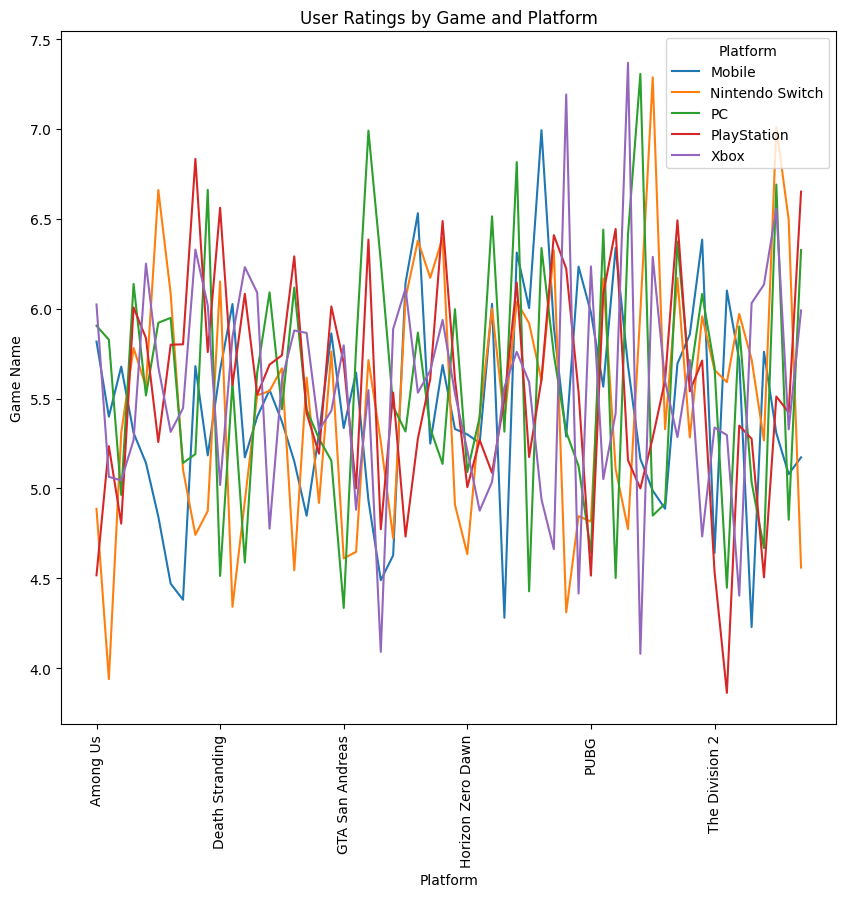

In [24]:
pivoted_data.plot(kind='line',figsize=(10,9))
plt.title('User Ratings by Game and Platform')
plt.xlabel('Platform')
plt.xticks(rotation=90)
plt.ylabel('Game Name')
plt.show()

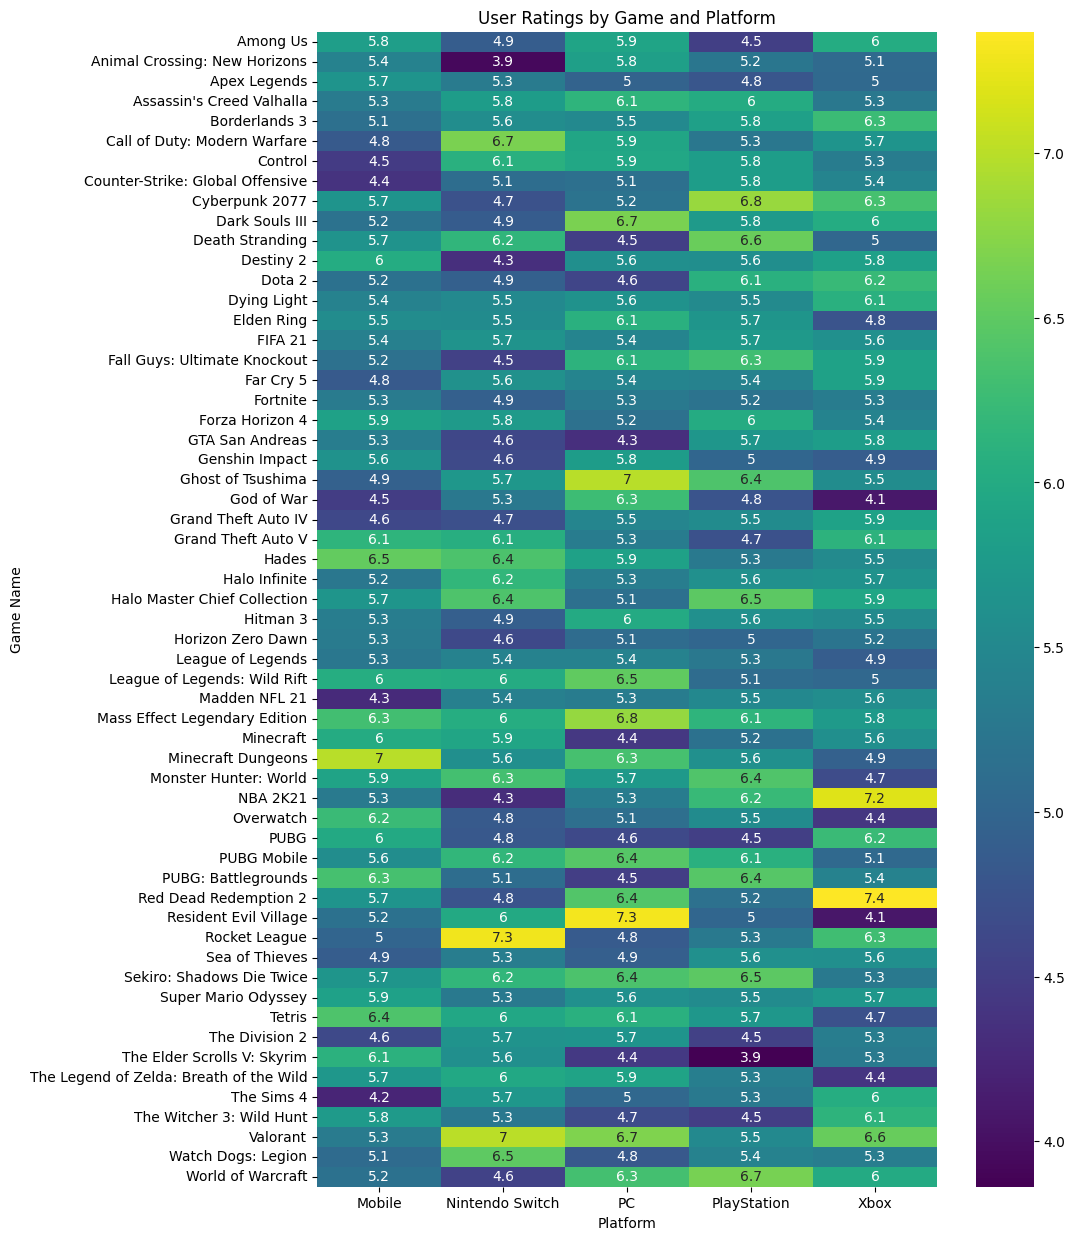

In [25]:
plt.figure(figsize=(10,15))
sns.heatmap(pivoted_data, annot=True, cmap='viridis')
plt.title('User Ratings by Game and Platform')
plt.xlabel('Platform')
plt.ylabel('Game Name')
plt.show()

## Which games have received the highest user ratings overall?

In [26]:
data.groupby(['Game Name'])['User Rating'].max().sort_values(ascending=False)

Game Name
NBA 2K21                                   9.996196
Minecraft                                  9.994527
Control                                    9.993194
Valorant                                   9.988694
Elden Ring                                 9.988145
Overwatch                                  9.987679
PUBG Mobile                                9.987600
The Witcher 3: Wild Hunt                   9.987243
World of Warcraft                          9.987004
Super Mario Odyssey                        9.980222
Cyberpunk 2077                             9.978160
Hades                                      9.977268
Dota 2                                     9.975829
Halo Master Chief Collection               9.948886
Sekiro: Shadows Die Twice                  9.945845
Hitman 3                                   9.944612
Among Us                                   9.944041
Grand Theft Auto V                         9.942248
Assassin's Creed Valhalla                  9.935586
Fo

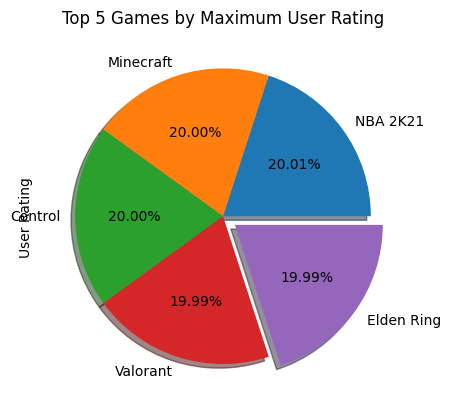

In [27]:
data.groupby(['Game Name'])['User Rating'].max().sort_values(ascending=False).head(5).plot(kind='pie',explode=(0,0,0,0,0.1),shadow=True,autopct="%1.2f%%")
plt.title('Top 5 Games by Maximum User Rating')
plt.show()

## What is the most popular platform for games ?

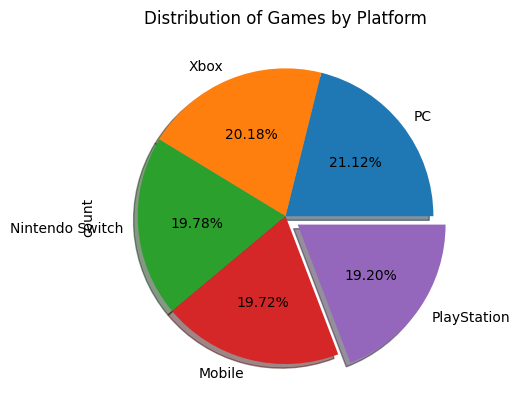

In [28]:
data['Platform'].value_counts().plot(kind='pie',explode=(0,0,0,0,0.1),shadow=True,autopct="%1.2f%%")
plt.title('Distribution of Games by Platform')
plt.show()

In [29]:
data.columns

Index(['Game Name', 'Genre', 'Platform', 'Release Year', 'User Rating'], dtype='object')

## Does the distribution of genres reflect current trends in the gaming industry?

In [30]:
data['Genre'].value_counts()

Genre
Sports          403
Puzzle          384
Racing          369
Simulation      368
Stealth         360
Role-playing    360
Horror          356
Strategy        353
Survival        353
Adventure       342
Action          340
Platformer      338
Shooter         337
Fighting        337
Name: count, dtype: int64

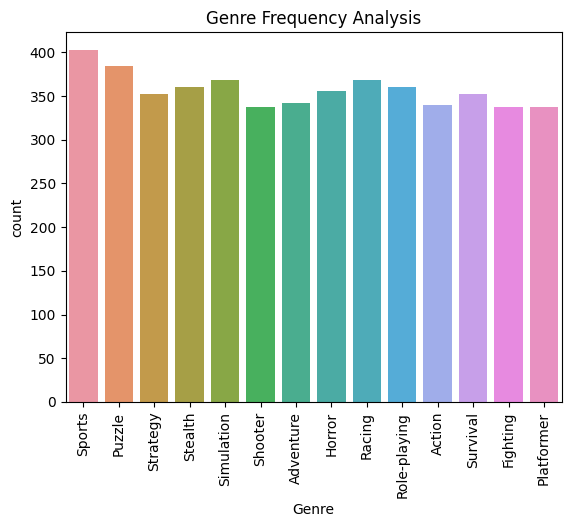

In [31]:
sns.countplot(x='Genre',data=data)
plt.title('Genre Frequency Analysis')
plt.xticks(rotation=90)
plt.show()

In [32]:
data

,Game Name,Genre,Platform,Release Year,User Rating
0,Sekiro: Shadows Die Twice,Sports,Nintendo Switch,2014,9.654719
1,Control,Puzzle,Nintendo Switch,2000,3.457386
2,Among Us,Strategy,Nintendo Switch,2007,5.367622
3,Call of Duty: Modern Warfare,Stealth,PlayStation,2005,1.240325
4,League of Legends,Simulation,PC,2021,3.535476
...,...,...,...,...,...
4995,The Legend of Zelda: Breath of the Wild,Sports,PC,2013,6.352838
4996,Assassin's Creed Valhalla,Stealth,Mobile,2020,1.852730
4997,Fall Guys: Ultimate Knockout,Sports,Mobile,2021,5.268067
4998,Borderlands 3,Platformer,Xbox,2018,4.558510
